In [145]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import norm, kstest
from scipy.stats import linregress
import scipy.stats as sts
from scipy.stats import cauchy

1. (5 marks) You will first download the world GDP data from the World Bank using pandas_datareader.
The following code will download and plot the entire world GDP time series. Do NOT make any local
copies of your data!

(you can ignore the warning about the code ‘WLD’). You will try to estimate the long-term annual growth
rate of the world using a regression.

(a) If the growth rate was a constant r, then the world’s GDP would grow as
GDPk = GDP0(1 + r)^k

where k is the number of years since 1960 and GDP0 is the world’s GDP in 1960. This is clearly not
a linear relationship between time (k, in years) and GDP. However, we can get a linear relationship
by applying a simple transformation f(−) on both side of the equation. What is this transformation?
(Hint: we used this transformation in the context of MLE, it turns products into sums.)

C:\Users\larie\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


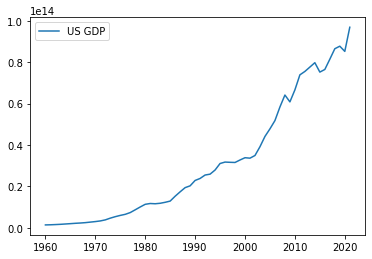

In [146]:
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD' , country='WLD' , start='1960' , end='2021' )
time = np.arange(1960 ,2022 )
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()

gdp = np.flip(gdp)

plt.plot(time, gdp , label='US GDP')
plt.legend()
plt.show()

**Ans:** The transformation that allows us to convert from products to sums is by taking the natural log on both the sides, this also gives the linear relationship we are looking for:

$$ ln(GDP_k) = ln(GDP_0 \cdot (1 + r)^k) $$
$$ ln(GDP_k) = ln(GDP_0) + k \cdot ln(1 + r)) $$

(b) Apply this transformation f(−) to the GDP data, and perform a regression against the time variable.
On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and
your $R^2$ value.

R-squared value: 0.9656784695439937


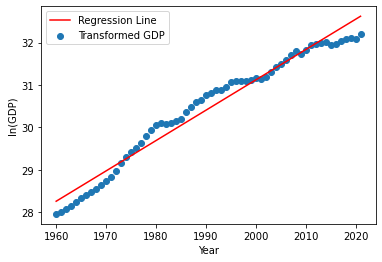

In [147]:
ln_GDP = np.log(gdp)

model = LinearRegression()
reshaped_time = time.reshape(-1,1)
model.fit(reshaped_time, ln_GDP)
predicted_GDP = model.predict(reshaped_time)

plt.scatter(time, ln_GDP, label='Transformed GDP')
plt.plot(time, predicted_GDP, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('ln(GDP)')
plt.legend()

r2 = r2_score(ln_GDP, predicted_GDP)
print("R-squared value:",r2)

plt.show()

(c) Compute the residuals of your regression (i.e. the difference between the model and the observations),
and print their mean and their standard deviation σˆ. Perform a KS-test to determine whether we
can reject the null hypothesis that the residuals are sampled from a normal distribution with mean
0 and standard deviation σˆ. Take α = 99%

**Ans:** From below calculated p-value, we can observe that it is larger than the significance level indicating that we cannot reject the null hypothesis. Therefore, we can conclude that the residuals may follow a normal distribution.

In [148]:
residuals = ln_GDP - predicted_GDP

residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
print("Mean of residuals: ",residuals_mean)
print("Standard deviation of residuals: ",residuals_std)

ks_statistic, ks_p_value = kstest(residuals, 'norm', args=(residuals_mean, residuals_std))

print("KS-test p-value: " ,ks_p_value)

Mean of residuals:  9.512104365820695e-15
Standard deviation of residuals:  0.2414462714832109
KS-test p-value:  0.22115691558069883


(d) You will now apply the inverse of the transformation f(−) to your linear model in order to get a
non-linear model for the GDP. On the same plot, display your (non-linear) model and a scatter-plot
of the (original) data points.

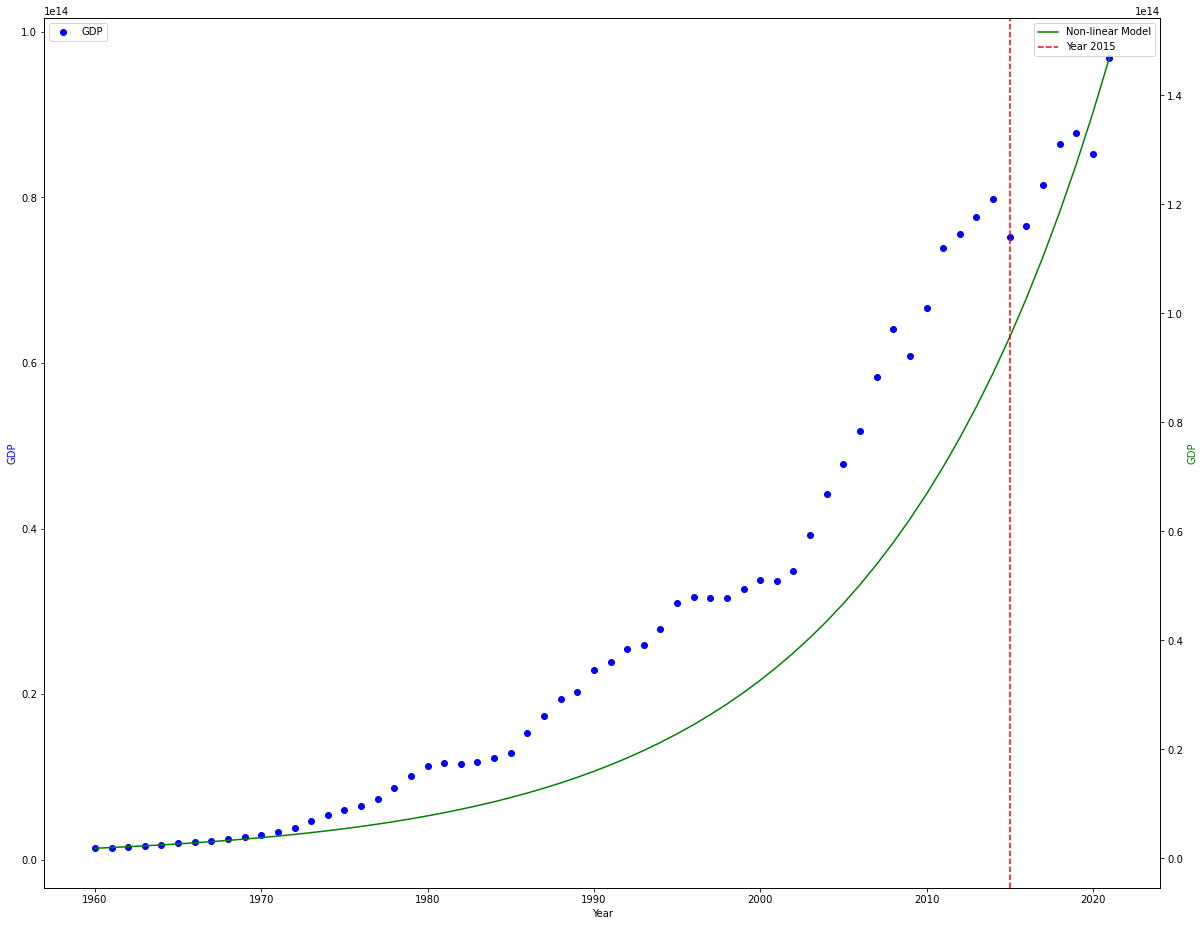

In [149]:
exp_GDP = np.exp(predicted_GDP)

fig, ax1 = plt.subplots()

# Plot the transformed data and linear regression line on the left y-axis
ax1.scatter(time, gdp, label='GDP', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(time, exp_GDP, color='green', label='Non-linear Model')
ax2.set_ylabel('GDP', color='green')
ax2.legend(loc='upper right')

plt.axvline(x=2015, linestyle='--', color='red', label='Year 2015')
plt.gcf().set_size_inches(20, 16)
plt.legend()
plt.show()


(e) What is the relationship between the slope of the regression and the long-term growth rate of the
world GDP? Compute the long-term growth rate of the world GDP.

**Ans:** The slope of the regression can be derived from the linear equation of GDP that is transformed using natural log. $$ b = ln(1+r)$$ To Compute the growth rate (r), we can derive it from the slope $$r = e^b - 1$$

In [150]:
beta = model.coef_[0]

long_term_growth_rate = np.exp(beta) - 1

print("Slope of the regression line (beta): ",beta)
print("Long-term growth rate of the world GDP: ",long_term_growth_rate * 100)


Slope of the regression line (beta):  0.07156635288409494
Long-term growth rate of the world GDP:  7.418942390303673


(f) What do you observe since approximately 2015?

We can observe that the GDP trend is deviating the non-linear model after 2015 

2) In this question you will study the distribution of the slope and intercept parameters of a
linear model. Consider the following model
yi = axi + b + εi where a =
1
2
, b = 2, εi ∼ Normal 
0,
1
5

, 1 ≤ i ≤ N (1)
For the purpose of this exercise you will take N = 200 and generate the xis by
x = np.linspace(−5, 5, 200)


(a) Generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the Ndimensional vectors (yi) against (xi), where yi
is given by (1).


In [151]:
x = np.linspace(-5, 5, 200)
slopes = []
intercepts = []

for i in range(10000):
    Ei = np.random.normal(0, np.sqrt(1/5), 200)
    
    y = (1/2)*x + 2 + Ei
    
    slope, intercept, r, p, se = linregress(x, y)
    
    slopes.append(slope)
    intercepts.append(intercept)

(b) Collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms
against their respective theoretical densities given in the lecture. What do you observe?

**Ans:** From the below plots, we can observe that the distributions are centered around their slope and intercept values i.e. a = 1/2 and b = 2 since the slope and the intercept are fixed in the linear model. Moreover, we can notice that the theoretical and simulation curves match suggesting that the linear regression estimates are consistant with the model as the error term in the model does not give any large variations which will mismatch the curves.

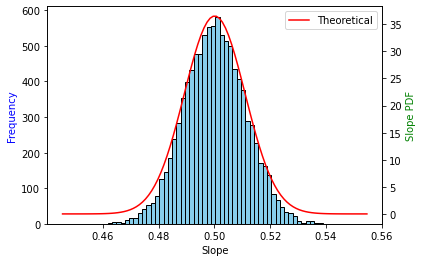

In [152]:
mean_slope = np.mean(slopes)
std_slope = np.std(slopes)

x_slopes = np.linspace(mean_slope - 5 * std_slope, mean_slope + 5 * std_slope, 100)
slope_pdf = norm.pdf(x_slopes, mean_slope, std_slope)

fig, ax1 = plt.subplots()

ax1.hist(slopes, bins=50, color='skyblue', edgecolor='black')
ax1.set_xlabel('Slope')
ax1.set_ylabel('Frequency', color='blue')

ax2 = ax1.twinx()
ax2.plot(x_slopes, slope_pdf, color='red', label='Theoretical')
ax2.set_ylabel('Slope PDF', color='green')
ax2.legend(loc='upper right')

plt.legend()
plt.show()


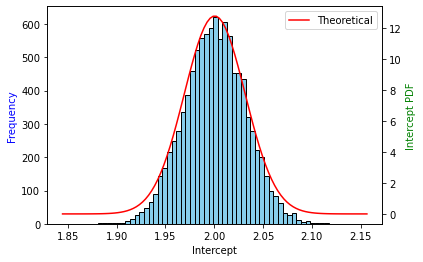

In [153]:
mean_intercept = np.mean(intercepts)
std_intercept = np.std(intercepts)

x_intercepts = np.linspace(mean_intercept - 5 * std_intercept, mean_intercept + 5 * std_intercept, 100)
intercept_pdf = norm.pdf(x_intercepts, mean_intercept, std_intercept)

fig, ax1 = plt.subplots()

ax1.hist(intercepts, bins=50, color='skyblue', edgecolor='black')
ax1.set_xlabel('Intercept')
ax1.set_ylabel('Frequency', color='blue')

ax2 = ax1.twinx()
ax2.plot(x_intercepts, intercept_pdf, color='red', label='Theoretical')
ax2.set_ylabel('Intercept PDF', color='green')
ax2.legend(loc='upper right')

plt.legend()
plt.show()

(c) For each of the 10000 regression, compute the test statistic for the slope and for the intercept (given
in the lecture) and plot their histograms against their theoretical density (also given in the lecture).
What do you observe?

**Ans:** From the below plots, it can be observed that the distributions of the z-test align with the theoretical distribution and also follow a normal distribution. This is due to Central Limit Theorem that states that distribution of the estimates approaches a normal distribution as the sample size increases. 

In [154]:
x_1 = np.linspace(-5, 5, 200)
ztest_slopes = []
ztest_intercepts = []

for i in range(10000):
    Ei = np.random.normal(0, np.sqrt(1/5), 200)
    
    y_1 = (1/2)*x_1 + 2 + Ei
    
    slope, intercept, r, p, se = linregress(x_1, y_1)
    
    ztest_slopes.append((slope-(1/2))/(np.std(x_1)/np.sqrt(200)))
    ztest_intercepts.append((intercept-2)/np.std(y_1 - slope * x_1))

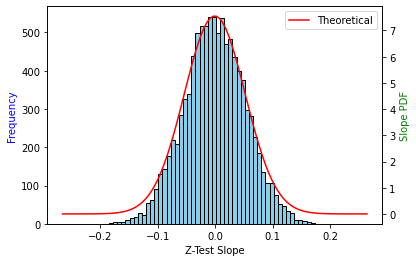

In [155]:
mean_ztest_slope = np.mean(ztest_slopes)
std_ztest_slope = np.std(ztest_slopes)

x_ztest_slopes = np.linspace(mean_ztest_slope - 5 * std_ztest_slope, mean_ztest_slope + 5 * std_ztest_slope, 100)
slope_ztest_pdf = norm.pdf(x_ztest_slopes, mean_ztest_slope, std_ztest_slope)

n = np.linspace(-5, 5, 100)
n_pdf = norm.pdf(n,0,1)

fig, ax1 = plt.subplots()

ax1.hist(ztest_slopes, bins=50, color='skyblue', edgecolor='black')
ax1.set_xlabel('Z-Test Slope')
ax1.set_ylabel('Frequency', color='blue')

ax2 = ax1.twinx()
ax2.plot(x_ztest_slopes, slope_ztest_pdf, color='red', label='Theoretical')
ax2.set_ylabel('Slope PDF', color='green')
ax2.legend(loc='upper right')

plt.legend()
plt.show()


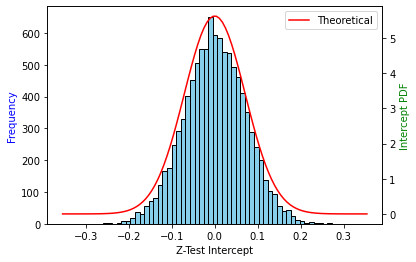

In [156]:
mean_ztest_intercept = np.mean(ztest_intercepts)
std_ztest_intercept = np.std(ztest_intercepts)

x_ztest_intercepts = np.linspace(mean_ztest_intercept - 5 * std_ztest_intercept, mean_ztest_intercept + 5 * std_ztest_intercept, 100)
intercept_ztest_pdf = norm.pdf(x_ztest_intercepts, mean_ztest_intercept, std_ztest_intercept)

fig, ax1 = plt.subplots()

ax1.hist(ztest_intercepts, bins=50, color='skyblue', edgecolor='black')
ax1.set_xlabel('Z-Test Intercept')
ax1.set_ylabel('Frequency', color='blue')

ax2 = ax1.twinx()
ax2.plot(x_ztest_intercepts, intercept_ztest_pdf, color='red', label='Theoretical')
ax2.set_ylabel('Intercept PDF', color='green')
ax2.legend(loc='upper right')

plt.legend()
plt.show()

(d) Take the last of your regressions and perform the following two tests with α = 99% (you may use
either p-values or critical regions but make sure you think about whether this is a one-sided or
two-sided test).
First test: H0 : a =
1
2
(assuming b = 2)
Second test: H0 : b = 2 (assuming a =
1
2
)

In [157]:
p_value_a = 2*(1 - sts.t.cdf(np.abs(ztest_slopes), 200-1)) 
p_value_b = 2*(1 - sts.t.cdf(np.abs(ztest_intercepts), 200-1)) 

first_test = p_value_a < 0.01
second_test = p_value_b < 0.01

print("p-value for slope",p_value_a)
if True in first_test:
    print("Reject null hypothesis")
else:
    print("Cannot reject null hypothesis")

print("")

print("p-value for intercept",p_value_b)
if True in second_test:
    print("Reject null hypothesis")
else:
    print("Cannot reject null hypothesis")

p-value for slope [0.99381    0.99259469 0.9883661  ... 0.97720459 0.99061356 0.98640803]
Cannot reject null hypothesis

p-value for intercept [0.96475913 0.95922464 0.95001078 ... 0.92363909 0.98572342 0.99031897]
Cannot reject null hypothesis


(e) Change the model to
yi = axi + b + εi where a =
1
2
, b = 2, εi ∼ Cauchy 
0,
1
5

, 1 ≤ i ≤ N (2)
Perform another 10000 regressions based on this model. Collect the slopes and intercepts of these
regressions as well as the associated statistics. Plot their histograms. What do you observe?

**Ans:** From the below plots, we can tell that the distributions are very narrow and this is due to cauchy's fat tails which causes extreme values to appear often impacting the estimation accuracy from the model.

In [158]:
x = np.linspace(-5, 5, 200)
slopes_cauchy = []
intercepts_cauchy = []

for i in range(10000):
    Ei = cauchy.rvs(loc=0, scale=1/5, size=200)
    
    y = (1/2)*x + 2 + Ei
    
    slope, intercept, r, p, se = linregress(x, y)
    
    slopes_cauchy.append(slope)
    intercepts_cauchy.append(intercept)

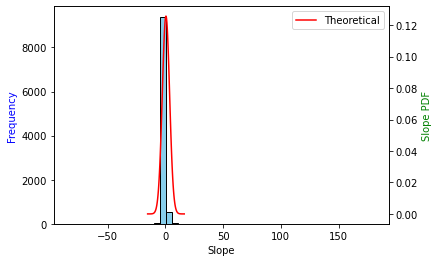

In [159]:
mean_cauchy_slope = np.mean(slopes_cauchy)
std_cauchy_slope = np.std(slopes_cauchy)

x_slopes_cauchy = np.linspace(mean_cauchy_slope - 5 * std_cauchy_slope, mean_cauchy_slope + 5 * std_cauchy_slope, 100)
slope_pdf_cauchy = norm.pdf(x_slopes_cauchy, mean_cauchy_slope, std_cauchy_slope)

fig, ax1 = plt.subplots()

ax1.hist(slopes_cauchy, bins=50, color='skyblue', edgecolor='black')
ax1.set_xlabel('Slope')
ax1.set_ylabel('Frequency', color='blue')

ax2 = ax1.twinx()
ax2.plot(x_slopes_cauchy, slope_pdf_cauchy, color='red', label='Theoretical')
ax2.set_ylabel('Slope PDF', color='green')
ax2.legend(loc='upper right')

plt.legend()
plt.show()

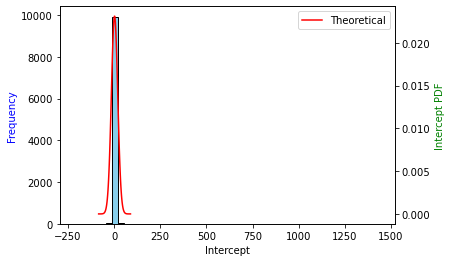

In [160]:
mean_intercept_cauchy = np.mean(intercepts_cauchy)
std_intercept_cauchy = np.std(intercepts_cauchy)

x_intercepts_cauchy = np.linspace(mean_intercept_cauchy - 5 * std_intercept_cauchy, mean_intercept_cauchy + 5 * std_intercept_cauchy, 100)
intercept_pdf_cauchy = norm.pdf(x_intercepts_cauchy, mean_intercept_cauchy, std_intercept_cauchy)

fig, ax1 = plt.subplots()

ax1.hist(intercepts_cauchy, bins=50, color='skyblue', edgecolor='black')
ax1.set_xlabel('Intercept')
ax1.set_ylabel('Frequency', color='blue')

ax2 = ax1.twinx()
ax2.plot(x_intercepts_cauchy, intercept_pdf_cauchy, color='red', label='Theoretical')
ax2.set_ylabel('Intercept PDF', color='green')
ax2.legend(loc='upper right')

plt.legend()
plt.show()